# TI3130: Exploratory Data Analysis Lab &mdash; Exercises (variant B)
**Julián Urbano &mdash; November 2021**

In [1]:
import sys
import numpy as np
import pandas as pd
from plotnine import *
from plotnine import __version__ as p9__version__
print("python", sys.version,
      "\nnumpy", np.__version__,
      "\npandas", pd.__version__,
      "\nplotnine", p9__version__)

python 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)] 
numpy 1.21.4 
pandas 1.3.4 
plotnine 0.8.0


For these exercises we will use the _AirBnB Berlin_ dataset and the _Diamonds_ dataset. Please refer to their HTML files for a description of the variables.

In [2]:
listings = pd.read_csv('airbnb_listings.csv')
listings.info()

diamonds = pd.read_csv('diamonds.csv')
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5000 non-null   int64  
 1   name                4983 non-null   object 
 2   host_id             5000 non-null   int64  
 3   host_name           4992 non-null   object 
 4   neighborhood_group  5000 non-null   object 
 5   neighborhood        5000 non-null   object 
 6   latitude            5000 non-null   float64
 7   longitude           5000 non-null   float64
 8   room_type           5000 non-null   object 
 9   price               5000 non-null   int64  
 10  minimum_nights      5000 non-null   int64  
 11  number_of_reviews   5000 non-null   int64  
 12  last_review         4390 non-null   object 
 13  reviews_per_month   4388 non-null   float64
dtypes: float64(3), int64(5), object(6)
memory usage: 547.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIn

a) Visualize the distribution of `neighborhood_group`s in a horizontal barplot. Sort `neighborhood_group`s in descending order by the number of observations.

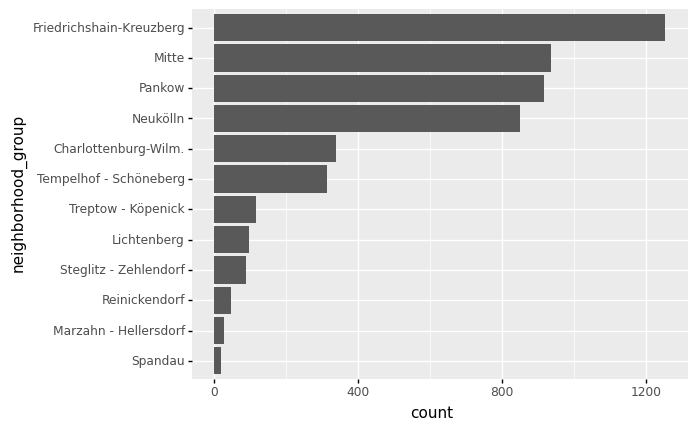

<ggplot: (149602824503)>

In [3]:
ggplot(listings, aes('neighborhood_group')) + \
    geom_bar() + \
    scale_x_discrete(limits = listings.groupby('neighborhood_group') \
                     .aggregate(n = ('neighborhood_group', 'count')) \
                     .sort_values('n').index.tolist() ) + \
    coord_flip()

b) The default histogram of `longitude` shows a bump at around `longitude = 13.35`. Modify the histogram in the slightest way such that the bump disappears but the overall shape of the distribution remains. Is it a good idea to do this?

C:\Users\GLau\VSCodeProjects\data-analytics\venv\lib\site-packages\plotnine\stats\stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 95'. Pick better value with 'binwidth'.


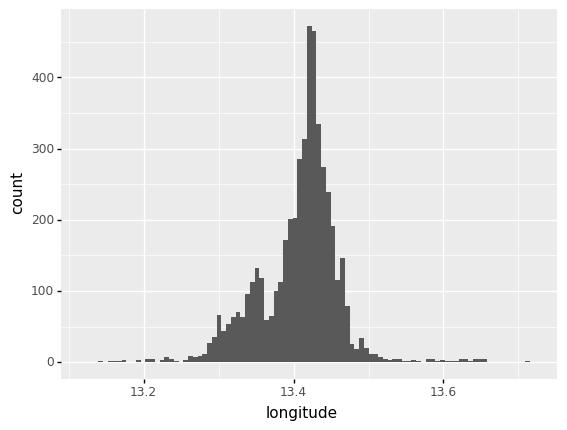

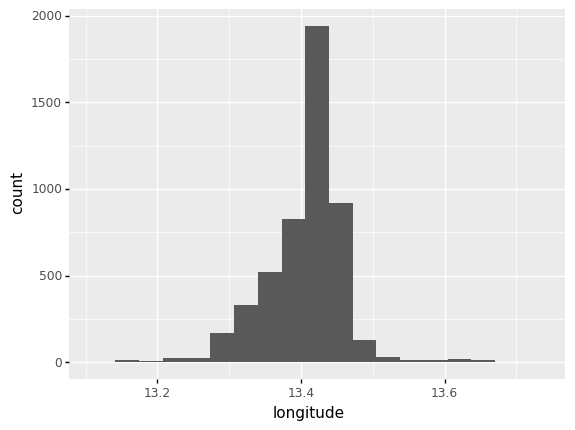

In [4]:
print(ggplot(listings, aes('longitude')) + \
    geom_histogram())

print(ggplot(listings, aes('longitude')) + \
    geom_histogram(bins=19))

Our answer to the question: it is probably not a good idea to do this, because you lose information. This results in a less complete representation of the data. 

c) Make a barplot to easily compare, for each diamon `cut`, the number of diamonds of a specific `clarity`.

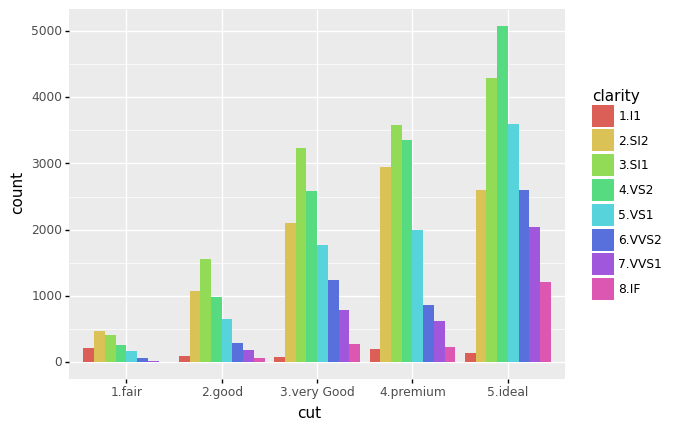

<ggplot: (149603004124)>

In [5]:
ggplot(diamonds, aes('cut', fill = 'clarity')) + \
    geom_bar(position = 'dodge')

d) Which variable seems to have the largest impact on a listing's `price`: `neighborhood_group` or `room_type`? Why? Consider only listings cheaper than 200€/night. You can answer this by looking at boxplots, for example.

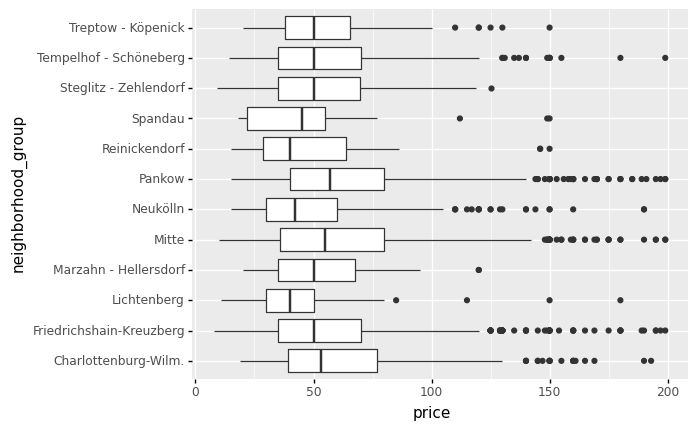

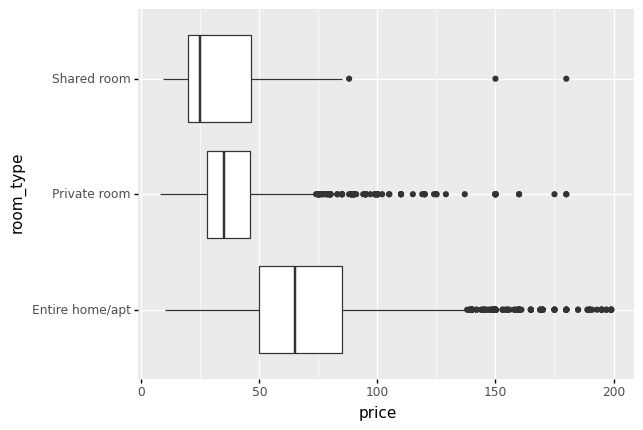

In [6]:
temp = listings.query('price < 200')

print(ggplot(temp, aes('neighborhood_group', 'price')) + \
      geom_boxplot() + \
      coord_flip()
     )

print(ggplot(temp, aes('room_type', 'price')) + \
      geom_boxplot() + \
      coord_flip()
     )

The variable 'room_type' seems to have the largest impact on a listing's 'price', because the medians and the (length of the) price ranges of the three roomtypes seem to differ more from each other than the medians and the (length of the) price ranges of the neighborhood groups.

e) Compute the age of each listing (you can use data about their reviews) and use a density plot to compare the distribution across `room_type`s. Do you see differences?

C:\Users\GLau\VSCodeProjects\data-analytics\venv\lib\site-packages\plotnine\layer.py:324: PlotnineWarning: stat_density : Removed 620 rows containing non-finite values.


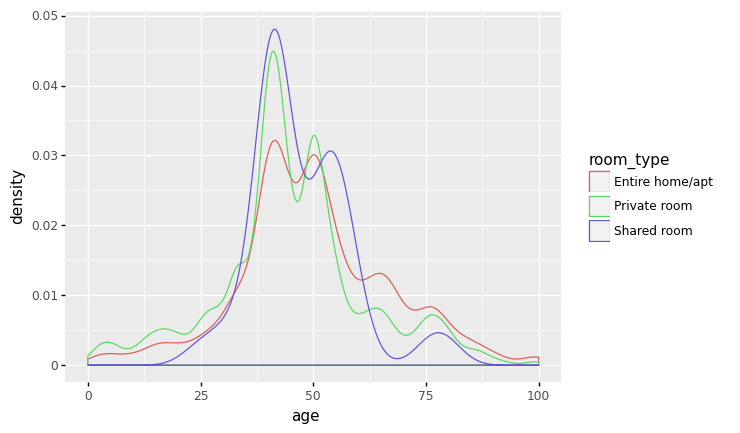

<ggplot: (149603311270)>

In [7]:
listings2 = listings \
    .assign(age = listings['number_of_reviews']/listings['reviews_per_month'])
ggplot(listings2, aes('age', color = 'room_type')) + \
    geom_density() + \
    xlim(0, 100)

There are relatively less listings with the roomtype 'Entire home/apt' than the other two roomtypes in the age range of about 38 till 45 months old. There are relatively more listings with the roomtype 'Entire home/apt' than the other two roomtypes in the age range of about 62 till 107.

f) Plot diamond `price` by `carat` and use transparency to help better visualizing the distribution.

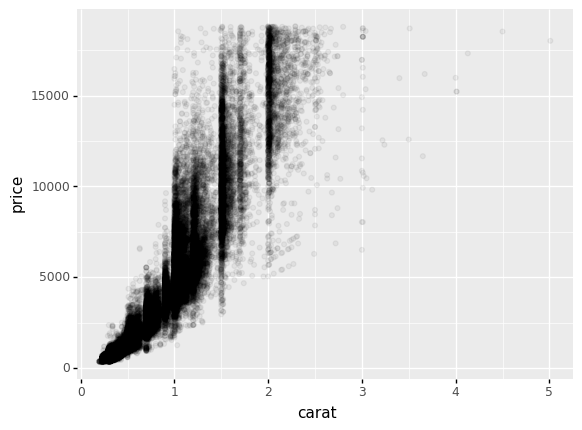

<ggplot: (149603158263)>

In [8]:
ggplot(diamonds, aes('carat', 'price')) + \
    geom_point(alpha = 0.05)

g) Repeat the previous plot, but instead of using transparency use a third variable to show some new insight in the data (eg. patterns, interesting observations, outliers, etc.) by mapping it to some aesthetic. What new insight do you see? Use transparency again if you think it helps.

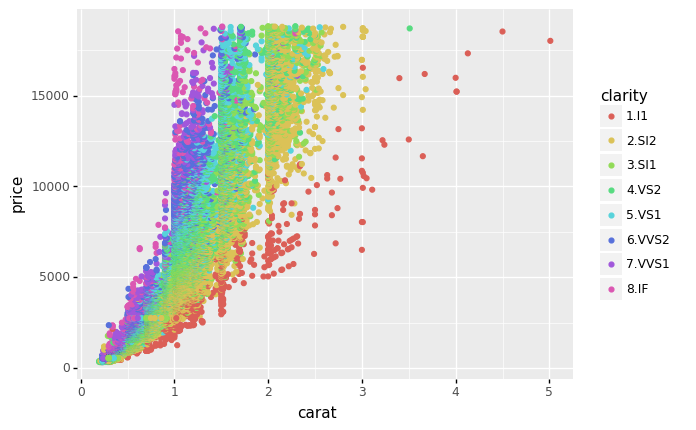

<ggplot: (149605930265)>

In [9]:
ggplot(diamonds, aes('carat', 'price', color = 'clarity')) + \
    geom_point()

For clarity type 1.I1 there seems to be a linear relationship between price and carat. For the other clarity types, it seems that the higher the clarity, the more rapidly the price increases when the number of carats increases.

h) Show the relationship between `price` and `cut`, faceted by `color`. Modify the plot however you think it's best to show the relationship.

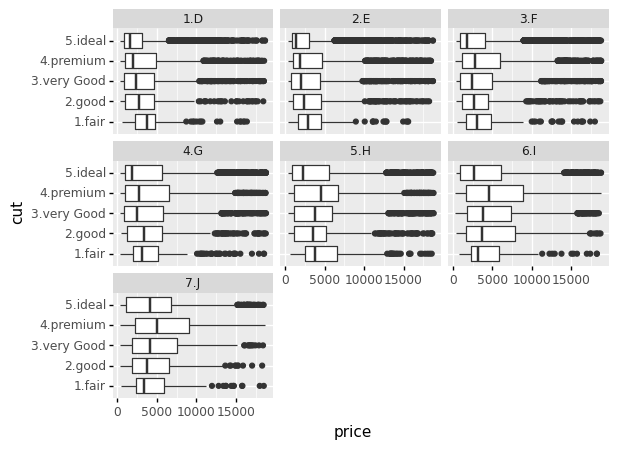

<ggplot: (149603582052)>

In [10]:
ggplot(diamonds, aes('cut', 'price')) + \
    geom_boxplot() + \
    coord_flip() + \
    facet_wrap('color')

i) Make a scatterplot of diamond `price` by `table`. Transform the scales such that the relationship becomes more uniform across the ranges (ie. points are more equally spread across the entire range).

C:\Users\GLau\VSCodeProjects\data-analytics\venv\lib\site-packages\plotnine\layer.py:401: PlotnineWarning: geom_point : Removed 12 rows containing missing values.


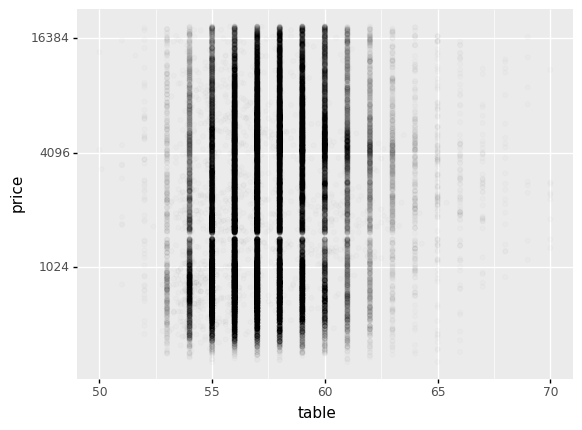

<ggplot: (149604355807)>

In [11]:
ggplot(diamonds, aes('table', 'price')) + \
    geom_point(alpha = 0.01) + \
    scale_y_continuous(trans='log2') + \
    xlim(50, 70)

j) Create an _unambiguous_ and _nontrivial_ question, and its corresponding solution, as if you were writing the set of exercises for the lab. The question must cover _at least 3_ of the following aspects:

- Contingency table or barplot
- Histogram or density plot
- Boxplot or violin plot
- Scatterplot or contour plot
- Additional variables for color, line type, etc
- Facets
- Transformations
- An open-ended question to explain some behavior

Please make it explicit which 3 of these aspects your question covers. You can use any of the datasets available on Brightspace.



Show the relationship between price and carat, faceted by clarity and cut. Transform the scales such that the relationship becomes more linear.

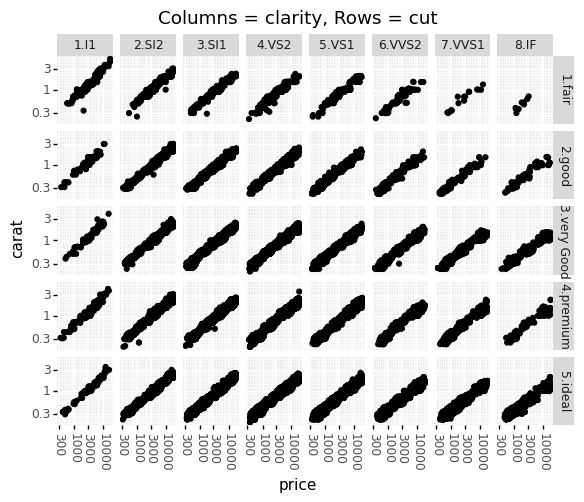

<ggplot: (149613246820)>

In [12]:
ggplot(diamonds, aes('price', 'carat')) + \
    geom_point() + \
    facet_grid('cut ~ clarity') + \
    labs(title = 'Columns = clarity, Rows = cut') +\
    scale_x_log10() + \
    scale_y_log10() + \
    theme(axis_text_x  = element_text(angle = 270))
    